In [2]:
# Imports the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Imports the requests library
import requests

# Imports the API key
from config import weather_api_key

In [3]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [4]:
# Imports the datetime module from the datetime library
from datetime import datetime

In [5]:
# Creates a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Adds the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [7]:
# Uses the citipy module to determine city based on latitude and longitude
from citipy import citipy

In [8]:
# Uses the tuple() function to display the latitude and longitude combinations
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

grand gaube mu
dinghai cn
koungheul sn
khatanga ru
hobart au
rio gallegos ar
port elizabeth za
geraldton au
qaanaaq gl
vila velha br
benguela ao
taolanaro mg
cape town za
tasiilaq gl
luderitz na
megion ru
bredasdorp za
rawson ar
galdar es
catarman ph
tasiilaq gl
nemuro jp
greece us
port hardy ca
punta arenas cl
novikovo ru
coquimbo cl
taolanaro mg
grand gaube mu
changji cn
coihaique cl
kaitangata nz
balakhta ru
chokurdakh ru
amderma ru
taolanaro mg
lolua tv
juneau us
hasaki jp
abalak ne
samalaeulu ws
jamestown sh
vaini to
salinas ec
vaini to
mataura pf
angoche mz
hilo us
mataura pf
trairi br
rikitea pf
ushuaia ar
punta arenas cl
sumare br
bluff nz
castro cl
flinders au
mahebourg mu
wulanhaote cn
bathsheba bb
sentyabrskiy ru
bredasdorp za
redcliffe zw
albany au
nizhneyansk ru
bluff nz
albany au
saint george bm
vaini to
pevek ru
atuona pf
san cristobal ec
saint george bm
upernavik gl
geraldton au
chuy uy
chuy uy
meyungs pw
rikitea pf
upernavik gl
vaitupu wf
jamestown sh
tasiilaq gl
alban

arraial do cabo br
acari pe
grand gaube mu
barranca pe
hermanus za
makaha us
krasnokholm ru
florianopolis br
mahebourg mu
east london za
port elizabeth za
port elizabeth za
ostrovnoy ru
severo-kurilsk ru
hilo us
port alfred za
port lincoln au
port alfred za
hermanus za
arraial do cabo br
busselton au
saint george bm
maniitsoq gl
waterloo us
samalaeulu ws
taolanaro mg
taolanaro mg
miranorte br
alto araguaia br
ushuaia ar
san cristobal ec
yulara au
mineros bo
ushuaia ar
ranau my
yellowknife ca
axim gh
cape town za
catalina foothills us
severo-kurilsk ru
zdvinsk ru
mayumba ga
rikitea pf
tasiilaq gl
tateyama jp
gasa bt
ushuaia ar
bambous virieux mu
bambous virieux mu
ornskoldsvik se
bourail nc
hamilton bm
mataura pf
bambous virieux mu
victoria point au
hithadhoo mv
rikitea pf
pisco pe
taolanaro mg
arraial do cabo br
taolanaro mg
neuquen ar
paucartambo pe
butaritari ki
lompoc us
hihifo to
kalmunai lk
fairbanks us
illoqqortoormiut gl
nexo dk
macamic ca
severo-kurilsk ru
basco ph
bethel us
ye

In [9]:
# Creates a list for holding the cities
cities = []

# Identifies the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Prints the city count to confirm sufficient count
len(cities)

606

In [10]:
# Creates an empty list to hold the weather data
city_data = []
# Prints the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Creates counters
record_count = 1
set_count = 1

# Loops through all the cities in the list
for i, city in enumerate(cities):

    # Groups cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Creates endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")

    # Logs the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Adds 1 to the record count
    record_count += 1
    
# Runs an API request for each of the cities
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicates that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grand gaube
Processing Record 2 of Set 1 | dinghai
Processing Record 3 of Set 1 | koungheul
Processing Record 4 of Set 1 | khatanga
Processing Record 5 of Set 1 | hobart
Processing Record 6 of Set 1 | rio gallegos
Processing Record 7 of Set 1 | port elizabeth
Processing Record 8 of Set 1 | geraldton
Processing Record 9 of Set 1 | qaanaaq
Processing Record 10 of Set 1 | vila velha
Processing Record 11 of Set 1 | benguela
Processing Record 12 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 13 of Set 1 | cape town
Processing Record 14 of Set 1 | tasiilaq
Processing Record 15 of Set 1 | luderitz
Processing Record 16 of Set 1 | megion
Processing Record 17 of Set 1 | bredasdorp
Processing Record 18 of Set 1 | rawson
Processing Record 19 of Set 1 | galdar
Processing Record 20 of Set 1 | catarman
Processing Record 21 of Set 1 | nemuro
Processing Record 22 of Set 1 | greece
Processing R

Processing Record 35 of Set 4 | barrow
Processing Record 36 of Set 4 | kawana waters
City not found. Skipping...
Processing Record 37 of Set 4 | spring valley
Processing Record 38 of Set 4 | jhunjhunun
Processing Record 39 of Set 4 | sao jose do belmonte
Processing Record 40 of Set 4 | yulin
Processing Record 41 of Set 4 | chekmagush
Processing Record 42 of Set 4 | navahrudak
Processing Record 43 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 44 of Set 4 | lavrentiya
Processing Record 45 of Set 4 | flagstaff
Processing Record 46 of Set 4 | iralaya
Processing Record 47 of Set 4 | sur
Processing Record 48 of Set 4 | teguldet
Processing Record 49 of Set 4 | alofi
Processing Record 50 of Set 4 | karamea
City not found. Skipping...
Processing Record 1 of Set 5 | mamallapuram
Processing Record 2 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 3 of Set 5 | fomboni
Processing Record 4 of Set 5 | avarua
Processing Record 5 of Set 5 | carna

Processing Record 24 of Set 8 | pedernales
Processing Record 25 of Set 8 | vostok
Processing Record 26 of Set 8 | jalu
Processing Record 27 of Set 8 | ciras
City not found. Skipping...
Processing Record 28 of Set 8 | armacao dos buzios
City not found. Skipping...
Processing Record 29 of Set 8 | cam ranh
Processing Record 30 of Set 8 | lentekhi
Processing Record 31 of Set 8 | iskateley
Processing Record 32 of Set 8 | broome
Processing Record 33 of Set 8 | hovd
Processing Record 34 of Set 8 | mahibadhoo
Processing Record 35 of Set 8 | thompson
Processing Record 36 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 37 of Set 8 | sinnamary
Processing Record 38 of Set 8 | coos bay
Processing Record 39 of Set 8 | dauphin
Processing Record 40 of Set 8 | torbay
Processing Record 41 of Set 8 | thurso
Processing Record 42 of Set 8 | atherton
Processing Record 43 of Set 8 | cockburn town
Processing Record 44 of Set 8 | kahului
Processing Record 45 of Set 8 | bonnyville
Process

Processing Record 13 of Set 12 | kamaishi
Processing Record 14 of Set 12 | taltal
Processing Record 15 of Set 12 | pandan
Processing Record 16 of Set 12 | labrea
Processing Record 17 of Set 12 | luanda
Processing Record 18 of Set 12 | eyrarbakki
Processing Record 19 of Set 12 | springdale
Processing Record 20 of Set 12 | shimoda
Processing Record 21 of Set 12 | ndola
Processing Record 22 of Set 12 | san quintin
Processing Record 23 of Set 12 | evensk
Processing Record 24 of Set 12 | dabakala
Processing Record 25 of Set 12 | lyskovo
Processing Record 26 of Set 12 | clyde river
Processing Record 27 of Set 12 | hofn
Processing Record 28 of Set 12 | kiama
Processing Record 29 of Set 12 | san jeronimo
Processing Record 30 of Set 12 | jacareacanga
Processing Record 31 of Set 12 | sept-iles
Processing Record 32 of Set 12 | jablanica
Processing Record 33 of Set 12 | yatou
Processing Record 34 of Set 12 | bardiyah
Processing Record 35 of Set 12 | polis
Processing Record 36 of Set 12 | gejiu
Pro

In [11]:
# Tallies number of cities in data frame
len(city_data)

551

In [12]:
# Converts the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Grand Gaube,-20.0064,57.6608,78.01,82,100,8.99,MU,2021-04-24 23:13:17
1,Dinghai,26.2847,119.7936,66.20,88,75,13.42,CN,2021-04-24 23:13:18
2,Koungheul,13.9833,-14.8000,83.66,26,17,12.30,SN,2021-04-24 23:13:18
3,Khatanga,71.9667,102.5000,30.83,95,100,16.08,RU,2021-04-24 23:13:18
4,Hobart,-42.8794,147.3294,54.00,71,75,11.50,AU,2021-04-24 23:09:51
5,Rio Gallegos,-51.6226,-69.2181,48.20,66,0,6.91,AR,2021-04-24 23:13:19
6,Port Elizabeth,-33.9180,25.5701,55.40,100,90,3.44,ZA,2021-04-24 23:13:19
7,Geraldton,-28.7667,114.6000,57.20,82,49,9.22,AU,2021-04-24 23:10:32
8,Qaanaaq,77.4840,-69.3632,27.68,69,94,7.36,GL,2021-04-24 23:10:57
9,Vila Velha,-20.3297,-40.2925,75.20,83,75,1.14,BR,2021-04-24 23:08:29


In [13]:
# Reorders columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Grand Gaube,MU,2021-04-24 23:13:17,-20.0064,57.6608,78.01,82,100,8.99
1,Dinghai,CN,2021-04-24 23:13:18,26.2847,119.7936,66.20,88,75,13.42
2,Koungheul,SN,2021-04-24 23:13:18,13.9833,-14.8000,83.66,26,17,12.30
3,Khatanga,RU,2021-04-24 23:13:18,71.9667,102.5000,30.83,95,100,16.08
4,Hobart,AU,2021-04-24 23:09:51,-42.8794,147.3294,54.00,71,75,11.50
5,Rio Gallegos,AR,2021-04-24 23:13:19,-51.6226,-69.2181,48.20,66,0,6.91
6,Port Elizabeth,ZA,2021-04-24 23:13:19,-33.9180,25.5701,55.40,100,90,3.44
7,Geraldton,AU,2021-04-24 23:10:32,-28.7667,114.6000,57.20,82,49,9.22
8,Qaanaaq,GL,2021-04-24 23:10:57,77.4840,-69.3632,27.68,69,94,7.36
9,Vila Velha,BR,2021-04-24 23:08:29,-20.3297,-40.2925,75.20,83,75,1.14


In [14]:
# Creates the output file (CSV)
output_data_file = "weather_data/cities.csv"
# Exports the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extracts relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

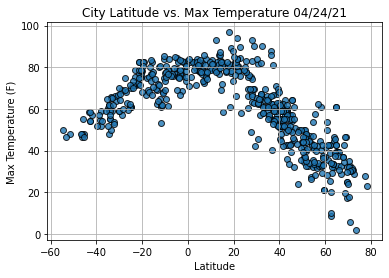

In [16]:
# Imports time module
import time

# Builds the scatter plot for latitude vs. max temperature
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporates the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Saves the figure
plt.savefig("weather_data/Fig1.png")

# Shows plot
plt.show()

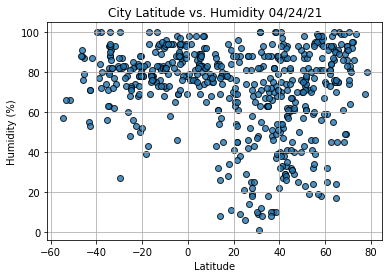

In [17]:
# Builds the scatter plots for latitude vs. humidity
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporates the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Saves the figure
plt.savefig("weather_data/Fig2.png")
# Shows plot
plt.show()

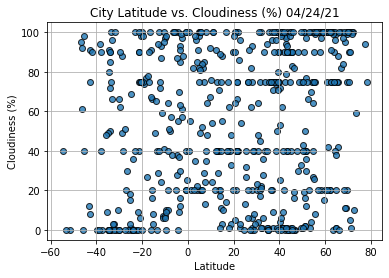

In [18]:
# Builds the scatter plots for latitude vs. cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporates the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Saves the figure
plt.savefig("weather_data/Fig3.png")
# Shows plot
plt.show()

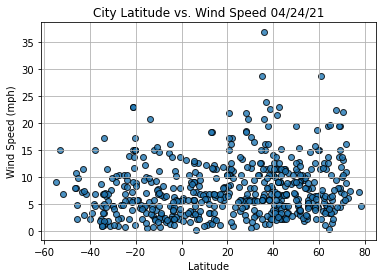

In [19]:
# Builds the scatter plots for latitude vs. wind speed
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporates the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Saves the figure
plt.savefig("weather_data/Fig4.png")
# Shows plot
plt.show()

In [20]:
# Imports linregress
from scipy.stats import linregress

# Creates a function to perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Runs regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculates the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    # Gets the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Creates a scatter plot and plots the regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotates the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [23]:
# Creates Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

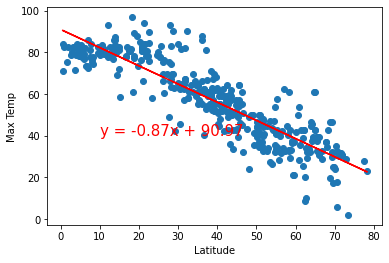

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Calls the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

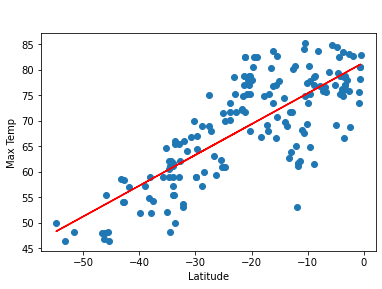

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Calls the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

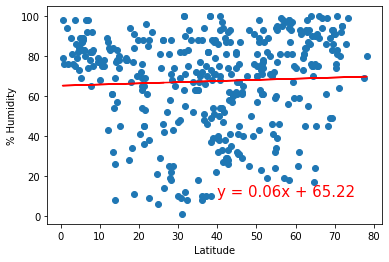

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Calls the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

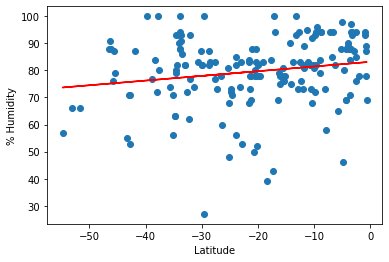

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Calls the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

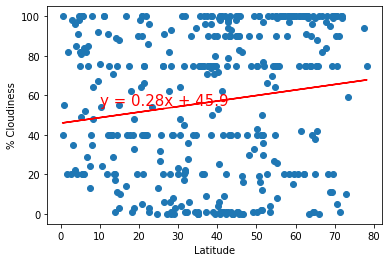

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Calls the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere \
                    for % Cloudiness', '% Cloudiness',(10,55))

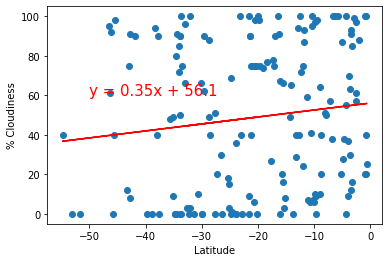

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Calls the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

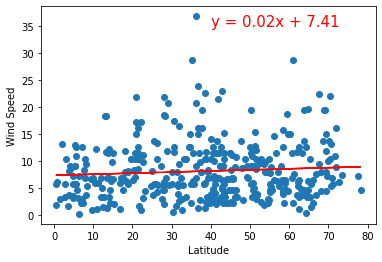

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Calls the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

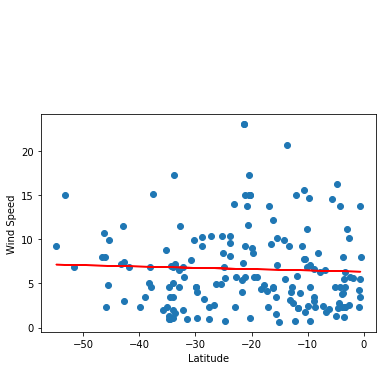

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Calls the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))